In [1]:
## Importing the csv file
import pandas as pd
df = pd.read_csv("iBeacon_RSSI_Labeled.csv", sep=',', decimal='.')
print(df.head(5))
## from the ouptput we notice that the file was loaded correctly

  location                 date  b3001  b3002  b3003  b3004  b3005  b3006  \
0      O02  10-18-2016 11:15:21   -200   -200   -200   -200   -200    -78   
1      P01  10-18-2016 11:15:19   -200   -200   -200   -200   -200    -78   
2      P01  10-18-2016 11:15:17   -200   -200   -200   -200   -200    -77   
3      P01  10-18-2016 11:15:15   -200   -200   -200   -200   -200    -77   
4      P01  10-18-2016 11:15:13   -200   -200   -200   -200   -200    -77   

   b3007  b3008  b3009  b3010  b3011  b3012  b3013  
0   -200   -200   -200   -200   -200   -200   -200  
1   -200   -200   -200   -200   -200   -200   -200  
2   -200   -200   -200   -200   -200   -200   -200  
3   -200   -200   -200   -200   -200   -200   -200  
4   -200   -200   -200   -200   -200   -200   -200  


In [2]:
## Data Pre processing

In [3]:
## Check the dimensions of the dataset to verify the number of rows and columns
df.shape
## from the output we can notice that the dimensions of the dataset are as expected with 1420 records and 15 features.

(1420, 15)

In [4]:
## Drop the date column as it is not neccessary for classification
df.drop("date", axis = 1, inplace = True)

In [5]:
## Verif that the date column is removed
df.head(5)

,location,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [6]:
##There are 105 levels of target feature but according to the map 18 * 21 = 375 possible levels
df['location'].nunique()

105

In [7]:
# Extra-whitespaces
## Uses the lambda function to remove the white spaces, based on the condition if the dtype of the attribute is object
## then the strip function is applied else the strip function won't be applied
df.loc[:] = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
## The output displays the dataset with white spaces removed
df.head(5)

,location,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [8]:
## UPPER CASE
#Cast all text data to upper-case by using an appropriate function.
## Uses a lambda function to cast all the data to upper case using the upper function
## The lambda function uses the condition where in only the attributes with dtype object are cast to Upper case
df.loc[:] = df.apply(lambda x : x.str.upper() if x.dtype=='object' else x)
## The data displayed shows all the text data records in upper case
df.head(5)

,location,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [9]:
## gives the column wise summary
df.describe()
## According to the summary RSSI values ranges from (-55) highest proximity to (-200) out of range

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,-197.825352,-156.623944,-175.533099,-164.534507,-178.378169,-175.063380,-195.637324,-191.970423,-197.145070,-197.442254,-197.748592,-197.233803,-196.065493
std,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


In [10]:
## From the below output we can conclude that :
## There are no NA values in the dataset
## The datatype of target attribute location is object
## The 13 descriptive features are integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 14 columns):
location    1420 non-null object
b3001       1420 non-null int64
b3002       1420 non-null int64
b3003       1420 non-null int64
b3004       1420 non-null int64
b3005       1420 non-null int64
b3006       1420 non-null int64
b3007       1420 non-null int64
b3008       1420 non-null int64
b3009       1420 non-null int64
b3010       1420 non-null int64
b3011       1420 non-null int64
b3012       1420 non-null int64
b3013       1420 non-null int64
dtypes: int64(13), object(1)
memory usage: 155.4+ KB


In [11]:
df['location'].unique()
## From the output we can conclude that:
## There are no misspellings
## There are some target features(location) containing V and W. They are W15 and V15 which are not expected as they are not
## present in the map. So that means actually there are 18(ibeacons) * 23 =  414 possible target values

array(['O02', 'P01', 'P02', 'R01', 'R02', 'S01', 'S02', 'T01', 'U02',
       'U01', 'J03', 'K03', 'L03', 'M03', 'N03', 'O03', 'P03', 'Q03',
       'R03', 'S03', 'T03', 'U03', 'U04', 'T04', 'S04', 'R04', 'Q04',
       'P04', 'O04', 'N04', 'M04', 'L04', 'K04', 'J04', 'I04', 'I05',
       'J05', 'K05', 'L05', 'M05', 'N05', 'O05', 'P05', 'Q05', 'R05',
       'S05', 'T05', 'U05', 'S06', 'R06', 'Q06', 'P06', 'O06', 'N06',
       'M06', 'L06', 'K06', 'J06', 'I06', 'F08', 'J02', 'J07', 'I07',
       'I10', 'J10', 'D15', 'E15', 'G15', 'J15', 'L15', 'R15', 'T15',
       'W15', 'I08', 'I03', 'J08', 'I01', 'I02', 'J01', 'K01', 'K02',
       'L01', 'L02', 'M01', 'M02', 'N01', 'N02', 'O01', 'I09', 'D14',
       'D13', 'K07', 'K08', 'N15', 'P15', 'I15', 'S15', 'U15', 'V15',
       'S07', 'S08', 'L09', 'L08', 'Q02', 'Q01'], dtype=object)

In [12]:
## Data transformation
## Transforming the -ve signals to +ve values by adding 200 to all the values, which will turn all the 
## -ve numbers to 0 and +ve numbers
## As all the signals are measured in the same range we can do this.
df.iloc[:,1:]

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [13]:
## Reference : https://stackoverflow.com/questions/30794525/adding-one-to-all-the-values-in-a-dataframe
## Find the columns which have the datatype as integer and store it in a variable numeric_cols
numeric_cols = [col for col in df if df[col].dtype.kind != 'O']

In [14]:
## add 200 to all the numeric columns
df[numeric_cols] += 200
## verify that 200 is added successfully
df.head(5)
## From the ouput we can see that 200 is added successfully EX: 200 - 78 = 122 which is the value in 1st row for b3006
## So a value 0(which was originally -200) will mean no Signal was detected.

,location,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,0,0,0,0,0,122,0,0,0,0,0,0,0
1,P01,0,0,0,0,0,122,0,0,0,0,0,0,0
2,P01,0,0,0,0,0,123,0,0,0,0,0,0,0
3,P01,0,0,0,0,0,123,0,0,0,0,0,0,0
4,P01,0,0,0,0,0,123,0,0,0,0,0,0,0


In [15]:
## Summary after data transformation
df.describe()
## According to the summary RSSI values ranges from (145) highest proximity to (0) out of range

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,2.174648,43.376056,24.466901,35.465493,21.621831,24.936620,4.362676,8.029577,2.854930,2.557746,2.251408,2.766197,3.934507
std,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,122.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,133.000000,141.000000,144.000000,144.000000,140.000000,138.000000,142.000000,144.000000,145.000000,139.000000,141.000000,140.000000,141.000000


In [16]:
## Data Exploration

In [17]:
## Split the String location and add it to a dataframe called levels
levels = pd.DataFrame(df.location.apply(list).tolist())
## Verify that the string is split into three different columns each for one character
levels.head(5)

,0,1,2
0,O,0,2
1,P,0,1
2,P,0,1
3,P,0,1
4,P,0,1


In [18]:
## Name the column with letters as x_cordinate and add it as a new column to the oringinal dataframe
df['x_cordinate'] = levels[0]
## Name the column with numbers as y_cordinate and add it as a new column to the oringinal dataframe
df['y_cordinate'] = levels[1].astype(str)+levels[2]
## Verify that the new columns are added
df.head(5)

,location,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,x_cordinate,y_cordinate
0,O02,0,0,0,0,0,122,0,0,0,0,0,0,0,O,02
1,P01,0,0,0,0,0,122,0,0,0,0,0,0,0,P,01
2,P01,0,0,0,0,0,123,0,0,0,0,0,0,0,P,01
3,P01,0,0,0,0,0,123,0,0,0,0,0,0,0,P,01
4,P01,0,0,0,0,0,123,0,0,0,0,0,0,0,P,01


In [19]:
## Plot a bar chart and check the location which has most number of records in the x_cordinate of the image
df['x_cordinate'].value_counts().plot(kind= 'bar')
## Analysis : The more number of records are between the I and U locations. 

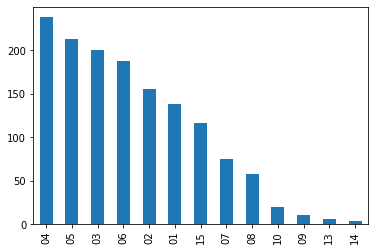

In [20]:
## Plot a bar chart and check the location which has most number of records in the y_cordinate of the image
df['y_cordinate'].value_counts().plot(kind = 'bar')
## Analysis : The more number of records are between the 01 and 06 locations of y_cordinate 

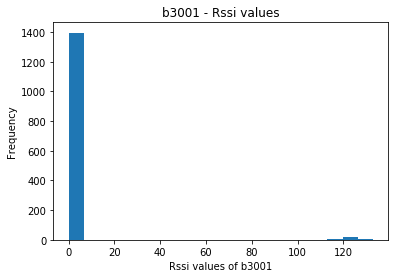

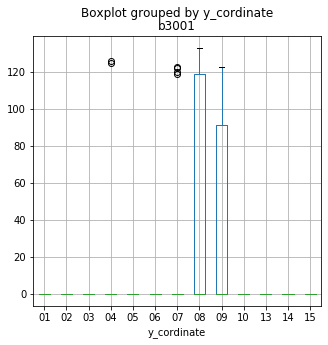

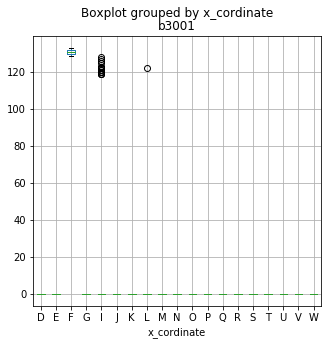

In [21]:
## 1) Exploration of ibeacon b3001
import matplotlib.pyplot as plt
df['b3001'].plot(kind='hist',bins=20)
plt.title('b3001 - Rssi values')
plt.xlabel('Rssi values of b3001')
df.dropna().boxplot(column='b3001',by='y_cordinate',figsize=(5,5))
df.dropna().boxplot(column='b3001',by='x_cordinate',figsize=(5,5))
## Analysis of b3001: The histogram shows very less number of instances where it is detected. As the ibeacon b3001 is placed 
## near the entrance it makes sense that it will be less detected. But the strong signals from this beacon is detected at: 
## x-coordinates F,I,L as displayed in the boxplot 
## y-coordinates 4 , 7 , 8 , 9

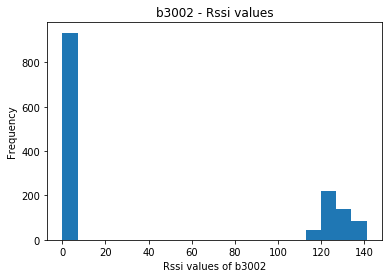

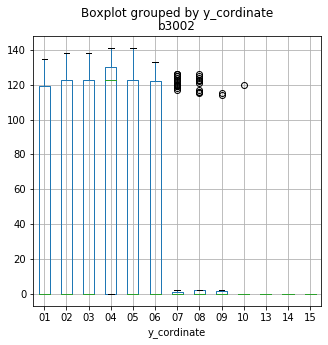

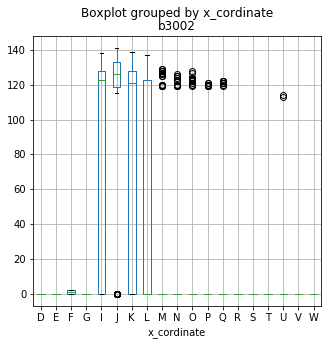

In [22]:
## Exploration of ibeacon b3002
df['b3002'].plot(kind='hist',bins=20)
plt.title('b3002 - Rssi values')
plt.xlabel('Rssi values of b3002')
df.dropna().boxplot(column='b3002',by='y_cordinate',figsize=(5,5))
df.dropna().boxplot(column='b3002',by='x_cordinate',figsize=(5,5))
## Analysis of b3002: It detects high number of RSSI signals at different locations as displayed in the histogram.
## It also has high signal strength detected in various coordinates of x and y.
## There is also a signal strength detected at U which could be an outlier, because considering the distance between 
## x-coordinat U and the ibeacon b3002 it is rarely possible to get an RSSI signal strength of 110.


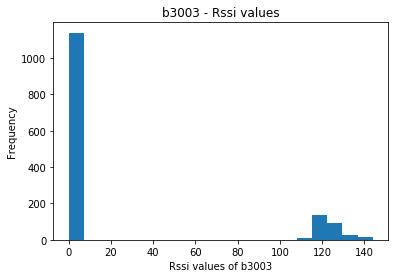

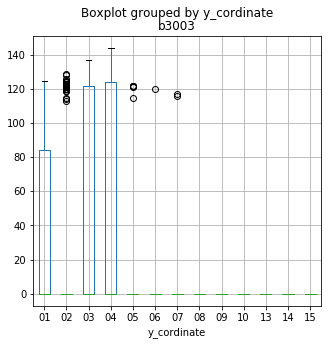

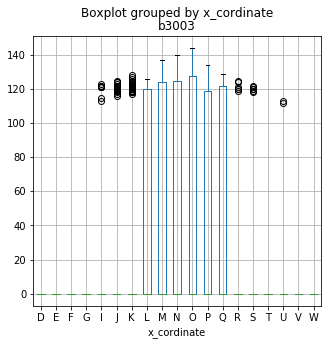

In [23]:
## Exploration of ibeacon b3003
df['b3003'].plot(kind='hist',bins=20)
plt.title('b3003 - Rssi values')
plt.xlabel('Rssi values of b3003')
df.dropna().boxplot(column='b3003',by='y_cordinate',figsize=(5,5))
df.dropna().boxplot(column='b3003',by='x_cordinate',figsize=(5,5))
## Analysis: RSSI Signals for b3003 is detected at various locations. For the y-coordinates the RSSI signals are detected at
## 1 to 7 and in x-coordinates they are detected from I to U. The highest variance of signal strength is at M to O in 
## x-coordinate and 3 to 4 in y-coordinate

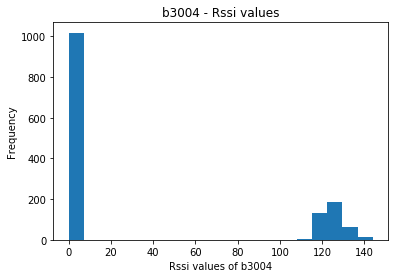

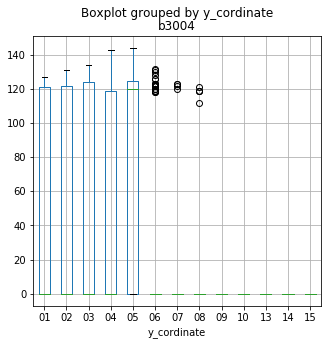

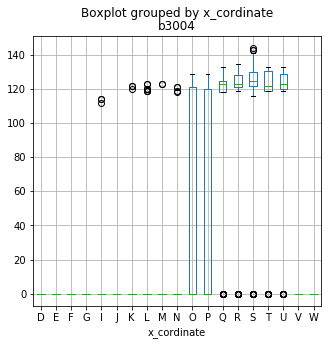

In [24]:
## Exploration of ibeacon b3004
df['b3004'].plot(kind='hist',bins=20)
plt.title('b3004 - Rssi values')
plt.xlabel('Rssi values of b3004')
df.dropna().boxplot(column='b3004',by='y_cordinate',figsize=(5,5))
df.dropna().boxplot(column='b3004',by='x_cordinate',figsize=(5,5))
## ANALYSIS: The RSSI values of ibeacon 4 are detected at similar locations to ibeacon 3. The highest variety of RSSI signals
## is detected at S in x-coordinate and 3,4,5 in y-coordinate

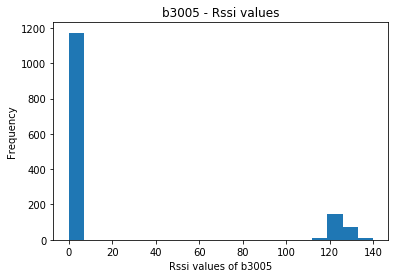

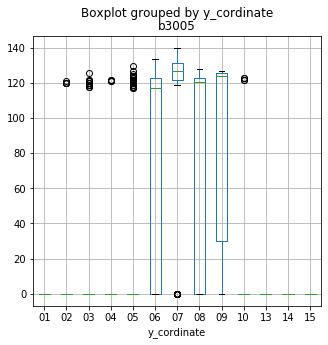

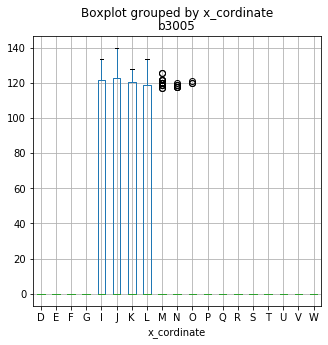

In [25]:
## Exploration of ibeacon b3005
df['b3005'].plot(kind='hist',bins=20)
plt.title('b3005 - Rssi values')
plt.xlabel('Rssi values of b3005')
df.dropna().boxplot(column='b3005',by='y_cordinate',figsize=(5,5))
df.dropna().boxplot(column='b3005',by='x_cordinate',figsize=(5,5))
## ANALYSIS: The RSSI signals are detected at various locations as displayed in the histogram.There are high 
## variety of signals detected between I and o in x-coordinate and 7 in y-coordinate as displayed in the boxplot.
## The y coordinate 7 has high RSSI values because the ibeacon b3005 is located near the y-coordinate location.

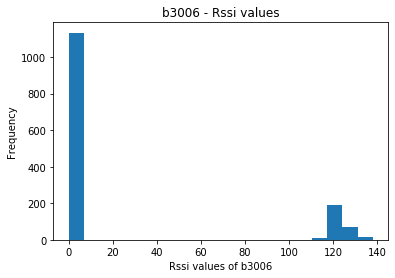

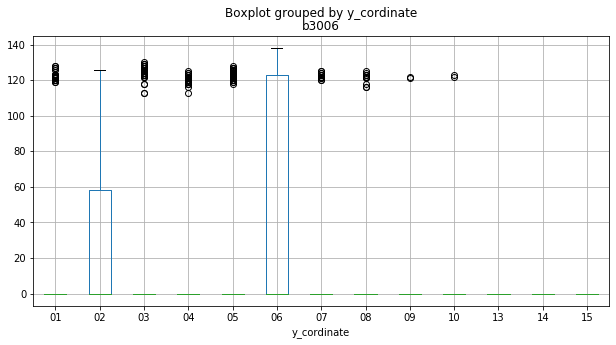

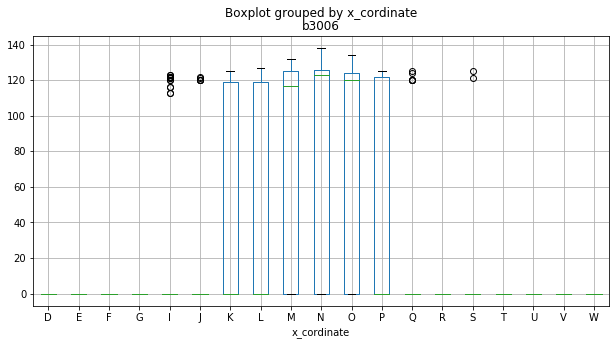

In [26]:
## Exploration of ibeacon b3006
df['b3006'].plot(kind='hist',bins=20)
plt.title('b3006 - Rssi values')
plt.xlabel('Rssi values of b3006')
df.dropna().boxplot(column='b3006',by='y_cordinate',figsize=(10,5))
df.dropna().boxplot(column='b3006',by='x_cordinate',figsize=(10,5))
## ANALYSIS: The detected signals in the histogram are almost in bell shaped curve which means the data might be normally
## distributed. As displayed in the boxplot of x-coordinate there is a relatively high number of times the signal is 
## detected between I to S and 1 to 10 in y-coordinate boxplot.

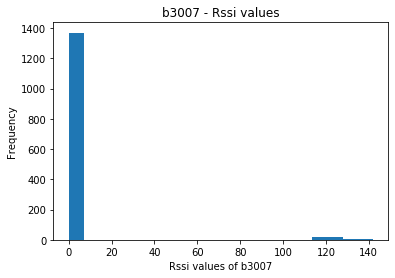

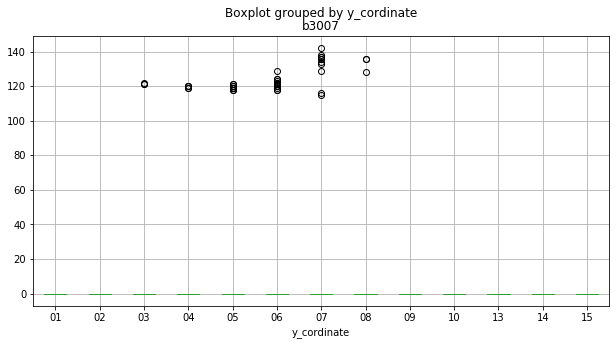

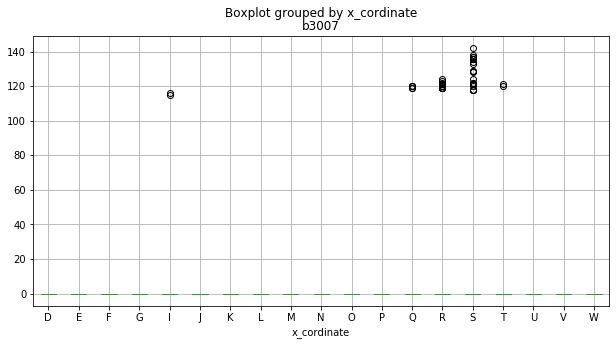

In [27]:
## Exploration of ibeacon b3007
df['b3007'].plot(kind='hist',bins=20)
plt.title('b3007 - Rssi values')
plt.xlabel('Rssi values of b3007')
df.dropna().boxplot(column='b3007',by='y_cordinate',figsize=(10,5))
df.dropna().boxplot(column='b3007',by='x_cordinate',figsize=(10,5))
## ANALYSIS: From the histogram we can see that ibeacon 7 has a very less number of signals detected. Most of the signals 
## were detected at 7 in y-coordinate as displayed in the y-coordinate boxplot and at S displayed in the x-coordinate
## boxplot. we notice an RSSI value of around 115 at I in x-coordinate which is highly unlikely so it might be an outlier.

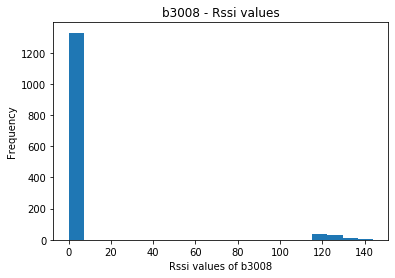

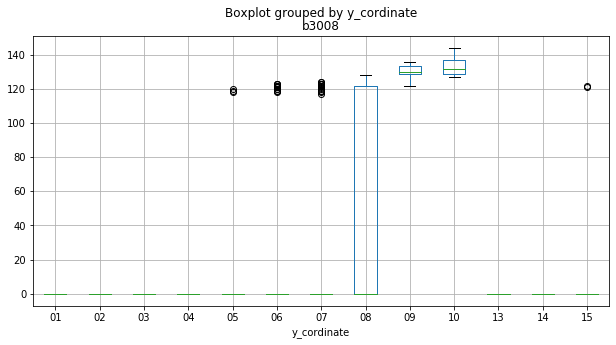

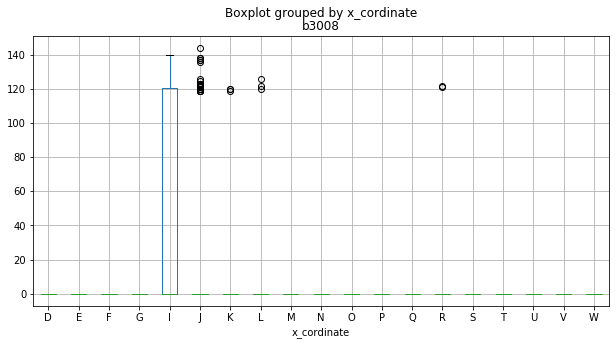

In [28]:
## Exploration of ibeacon b3008
df['b3008'].plot(kind='hist',bins=20)
plt.title('b3008 - Rssi values')
plt.xlabel('Rssi values of b3008')
df.dropna().boxplot(column='b3008',by='y_cordinate',figsize=(10,5))
df.dropna().boxplot(column='b3008',by='x_cordinate',figsize=(10,5))
## ANALYSIS: The RSSI values detected by ibeacon 8 is very less as displayed in the histogram. Highest RSSI values are 
## displayed in x-coordinate boxplot at I and J and 9 and 10 in y-coordinate. We can notice some values detected at 15 in 
## y-coordinate and a value at R detected in x-coordinate which might be outliers.

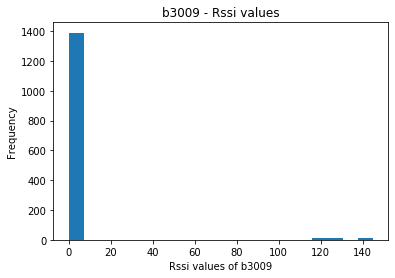

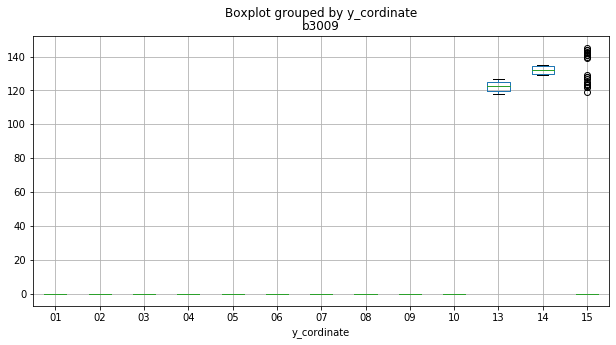

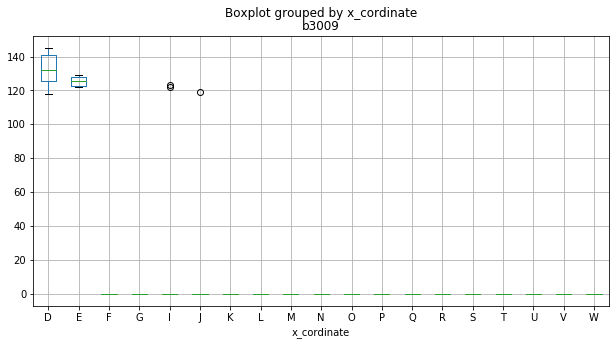

In [29]:
## Exploration of ibeacon b3009
df['b3009'].plot(kind='hist',bins=20)
plt.title('b3009 - Rssi values')
plt.xlabel('Rssi values of b3009')
df.dropna().boxplot(column='b3009',by='y_cordinate',figsize=(10,5))
df.dropna().boxplot(column='b3009',by='x_cordinate',figsize=(10,5))
## ANALYSIS: The RSSI Signal strength for b3009 is detected at very less number of instances as displayed in the histogram.
## Even when the signal is detected it is in a limited range. In x-coordinate it is detected at D and E. In y-coordinate it
## is detected at 13 and 14 as displayed in the respective boxplots.

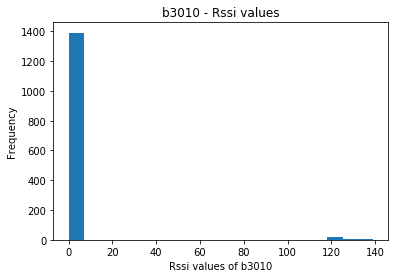

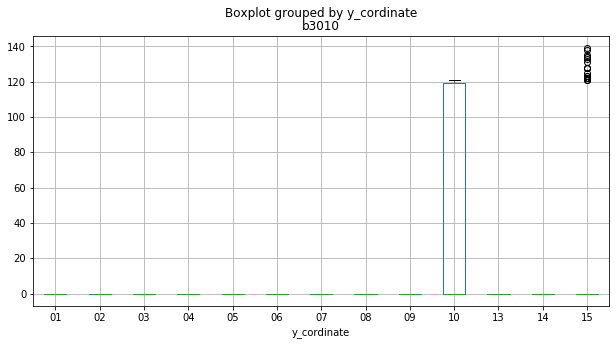

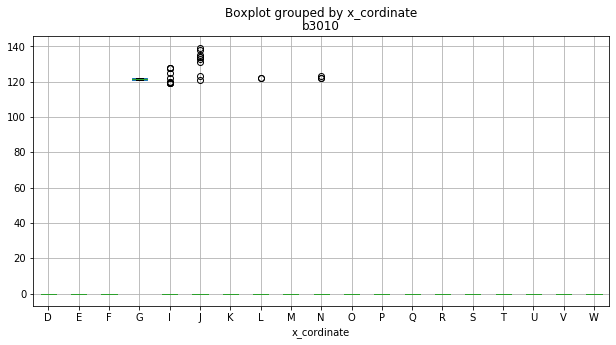

In [30]:
## Exploration of ibeacon b3010
df['b3010'].plot(kind='hist',bins=20)
plt.title('b3010 - Rssi values')
plt.xlabel('Rssi values of b3010')
df.dropna().boxplot(column='b3010',by='y_cordinate',figsize=(10,5))
df.dropna().boxplot(column='b3010',by='x_cordinate',figsize=(10,5))
## ANALYSIS: The RSSI signals are detected at very less instances for b3010 as displayed in the boxplot. In the y-coordinate
## the signals are detected at 15 and in x-coordinate for G , I, and J.

In [31]:
## Conclusion on Analysis of each ibeacon:
## It is clear from the analysis of RSSI signals of ibeacon that there is a relationship between the placement of an ibeacon
## and the signals detected. There are many instance where a signal from ibeacon is not detected(RSSI value=0) out of range.
## Most of the signal strengths seem to be distributed around 125 and the more instances where signal is detected
## the distribution looks like a normal distribution as displayed in some of the above histograms.
## There are some unusual Signal strengths detected like the b3002 is detected at the x-coordinate value U.

In [32]:
## TASK 2.2 : Explore the relationship between pairs of attributes

In [33]:
## Group the ibeacons based on the proximity and the location they are placed in. So the ibeacons which are placed in close 
## proxoimity might detect similar RSSI signal strength values.Based on the ibeacons placed in the image provided, we will
## group them in 3 groups:
## Group 1) b3002 , b3003 , b3004 , b3005 , b3006 , b3007
## Group 2) b3010 , b3011 , b3012 , b3013
## Group 3) b3001 , b3005 , b3008 , b3009 (Located at the entrance and have the least RSSI values)

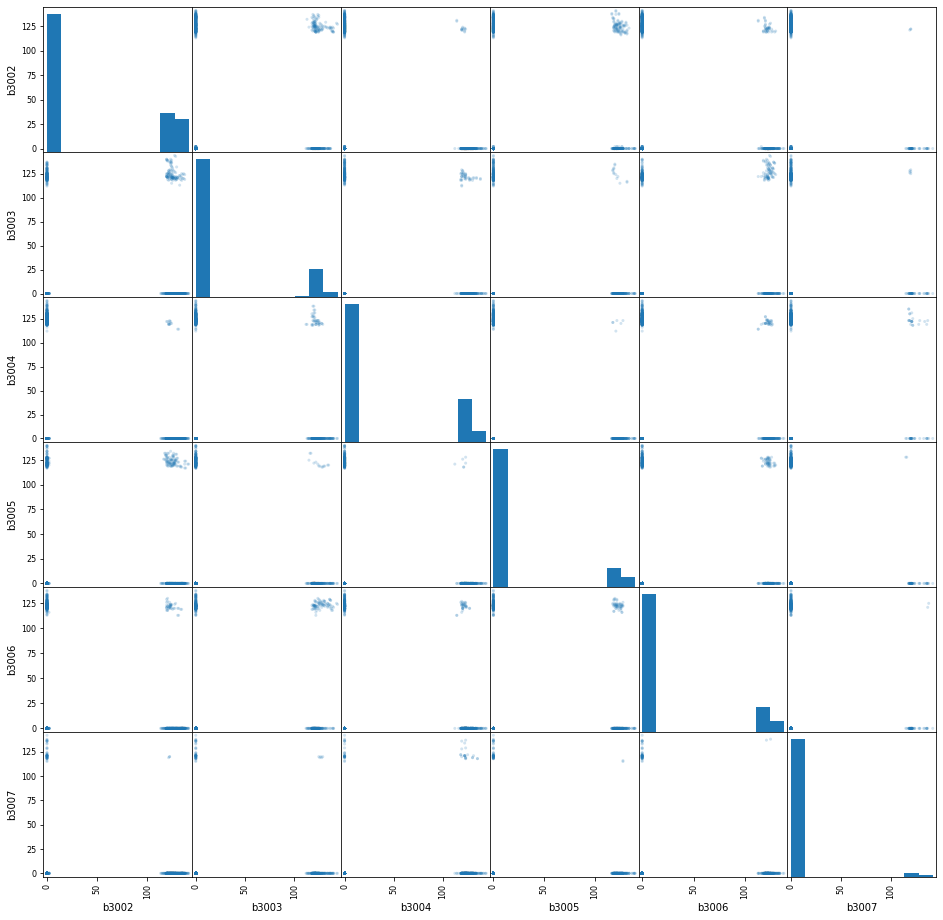

In [34]:
## ANALYSIS OF GROUP1 ibeacons( b3002 , b3003 , b3004 , b3005 , b3006 , b3007):
## Plot a scatter matrix to get insight of the data from Group 1
from pandas.plotting import scatter_matrix
group1 = df.iloc[:,2:8]
scatter_matrix(group1,alpha=0.2,figsize=(16,16),diagonal='hist')         
plt.show()
## ANALYSIS: From the below scatter matrix plot we can conclude that there is no or very less linear correlation
## exists between the ibeacons in group1(b3002 , b3003 , b3004 , b3005 , b3006 , b3007). 

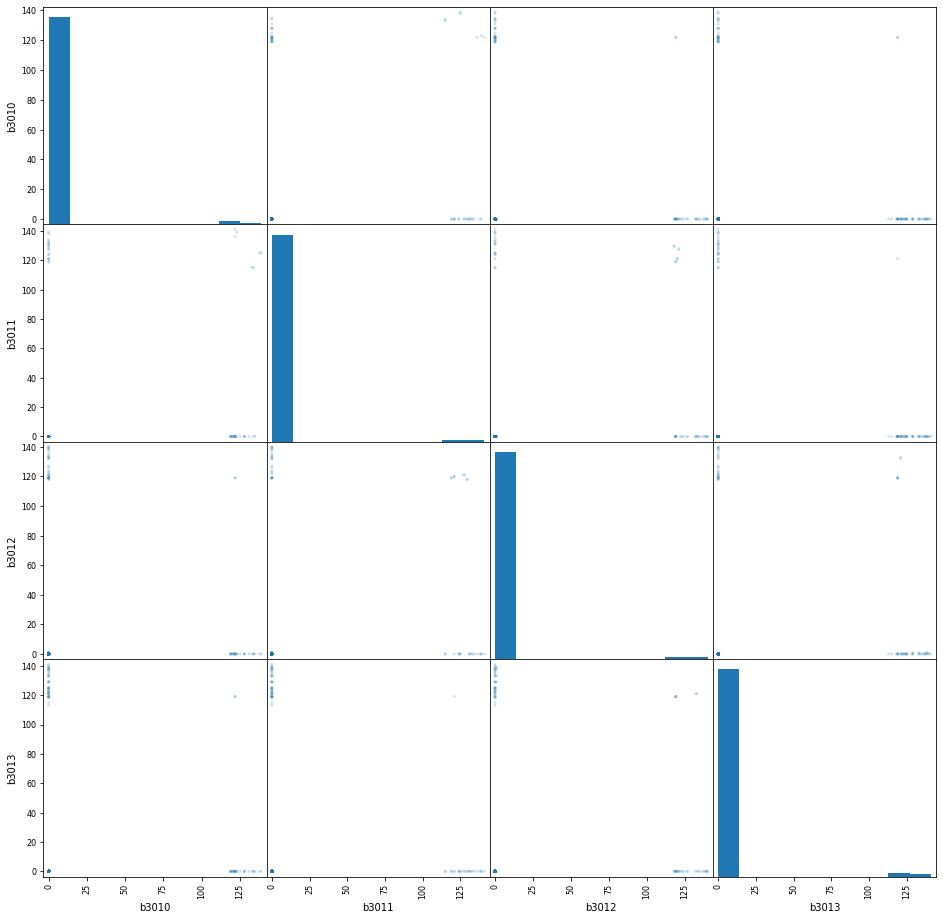

In [35]:
## ANALYSIS OF GROUP2 ibeacons( b3010 , b3011 , b3012 , b3013 ):
## Plot a scatter matrix to get insight of the data from Group 2
from pandas.plotting import scatter_matrix
group2 = df.iloc[:,10:14]
scatter_matrix(group2,alpha=0.2,figsize=(16,16),diagonal='hist')         
plt.show()
## ANALYSIS: From the below scatter matrix plot we can conclude that there is no or very less linear correlation
## exists between the ibeacons in group2(b3010 , b3011 , b3012 , b3013). 

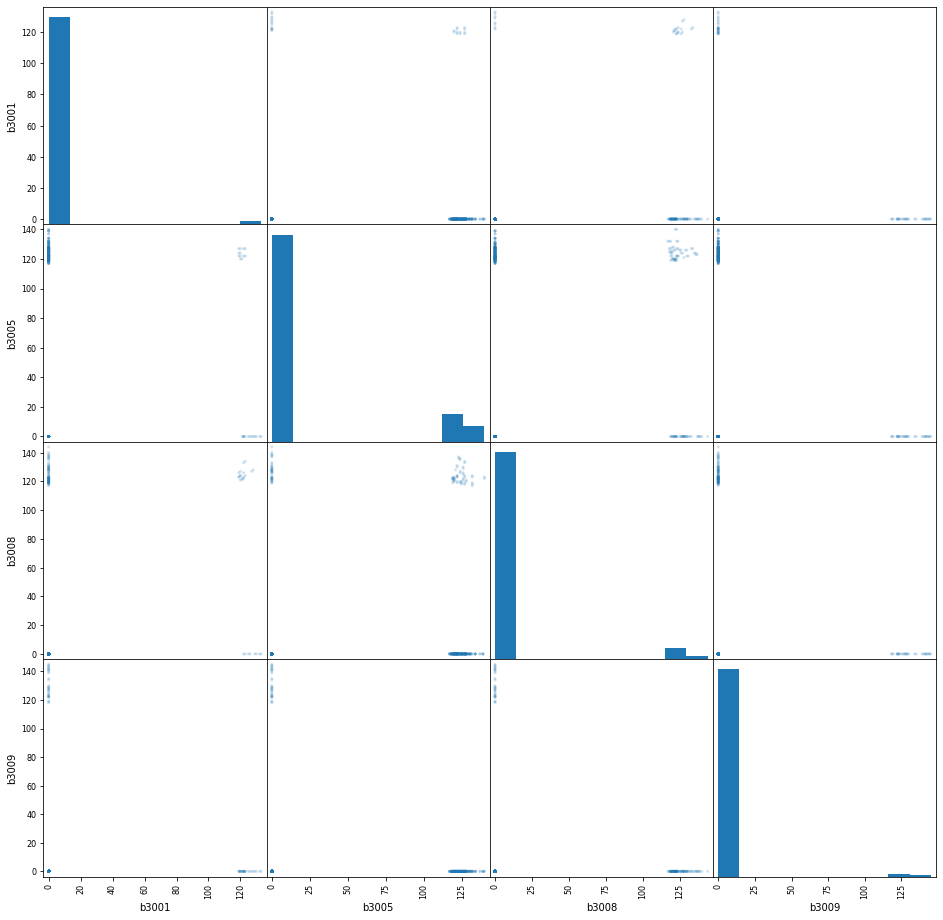

In [36]:
## ANALYSIS OF GROUP3 ibeacons( b3001 , b3005 , b3008 , b3009 ):
## Plot a scatter matrix to get insight of the data from Group 2
from pandas.plotting import scatter_matrix
group3 = df[['b3001' , 'b3005' , 'b3008' , 'b3009']]
scatter_matrix(group3,alpha=0.2,figsize=(16,16),diagonal='hist')         
plt.show()
## ANALYSIS: From the below scatter matrix plot we can conclude that there is no or very less linear correlation
## exists between the ibeacons in group3(b3001 , b3005 , b3008 , b3009). 

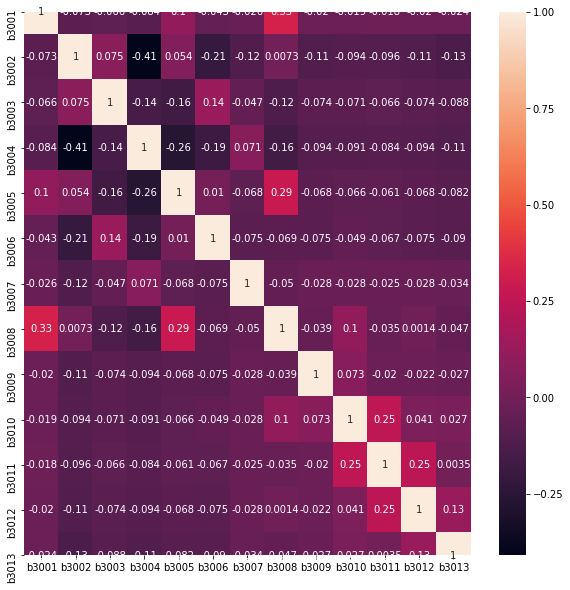

In [37]:
## Plot a heatmap and check the overall correlation between each and every pair of ibeacon
all_pairs = df.iloc[:,1:14]
## Create a correlation matrix
corrMatrix = all_pairs.corr()
## import seaborn library 
import seaborn as sn
import matplotlib.pyplot as plt
## set the figure size
plt.figure(figsize=(10, 10))
## plot the heatmap by passing the correlation matrix in the fucntion
sn.heatmap(corrMatrix, annot=True)
plt.show()

## ANALYSIS: The heatmap displays the correlation values ranging from -1 to +1.  
##There exists some correlation between some of the attributes. The ibeacons b3004 and b3002 have the highest 
## negative correlation(they are inversely proportional). The b3008 and b3001 have a positive correlation so as the RSSI 
## value of b3008 increases the value of b3001 also increases.

##Reference for Heatmap: https://datatofish.com/correlation-matrix-pandas/

In [38]:
##Data modelling

In [39]:
## Data modelling Using decison tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [40]:
## Store the ibeacon (features) in x
x = df.iloc[:,1:14]
## Store the target variable(location) in y
y = df.location

In [41]:
## Split the data into train(80%) and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1136, 13) (1136,)
(284, 13) (284,)


In [42]:
clf = DecisionTreeClassifier()
## Train the model by fitting the decision tree classifier on the training data
fit = clf.fit(X_train, y_train)
## Test the model by predicting the unseen test data
y_pre = fit.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
## Create the confusion matrix
cm = confusion_matrix(y_test , y_pre)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 3]]


In [44]:
from sklearn.metrics import accuracy_score
## Check the accuray score of prediction
accuracy_score(y_test,y_pre)

0.29577464788732394

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.12      0.17      0.14         6
         I03       0.25      0.25      0.25         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.33      0.50      0.40         4
         I07       0.29      0.40      0.33         5
         I08       0.36      0.50      0.42         8
         I09       1.00      1.00      1.00         3
         I10       0.75      1.00      0.86         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         4
         J02       0.00    

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [46]:
## pass the column names as list into variable h
h = list(x.columns)
from sklearn import tree
with open('shopping.dot','w') as f:
    f = tree.export_graphviz(clf, out_file = f, feature_names=h,
class_names=y, filled=True, rounded=True,
special_characters=True)

In [47]:
## K fold cross validation for decision tree
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4)

In [48]:
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x.iloc[train_index],x.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
 

TRAIN: [ 284  285  286 ... 1417 1418 1419] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [49]:
for k, (train_index, test_index) in enumerate(kf.split(x)):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.25704
[fold 1] score: 0.43310
[fold 2] score: 0.20423
[fold 3] score: 0.39789
[fold 4] score: 0.20423


In [50]:
## 2nd classifier model

In [51]:
## Knn Classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(5) 
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 
y_pre

array(['O04', 'O04', 'O04', 'O04', 'O04', 'M04', 'M04', 'P04', 'N04',
       'O04', 'M04', 'K05', 'M04', 'P04', 'P04', 'N02', 'M03', 'M01',
       'O04', 'M04', 'Q04', 'N04', 'O04', 'M04', 'J02', 'M04', 'L05',
       'Q04', 'Q04', 'M01', 'T04', 'Q04', 'O05', 'R04', 'P03', 'S04',
       'R05', 'R04', 'R04', 'S04', 'S04', 'T04', 'T04', 'S05', 'S05',
       'T04', 'R02', 'O05', 'R02', 'R02', 'P05', 'S05', 'P05', 'P05',
       'R01', 'R02', 'Q03', 'O05', 'P05', 'R02', 'O03', 'O05', 'O03',
       'R02', 'R02', 'O05', 'L08', 'R02', 'P05', 'R02', 'O05', 'R05',
       'S05', 'S05', 'R06', 'R06', 'R02', 'O05', 'P05', 'R02', 'R02',
       'R02', 'O03', 'Q03', 'O05', 'P03', 'R02', 'O03', 'P03', 'O03',
       'R02', 'O03', 'P03', 'R02', 'O03', 'K03', 'P03', 'P03', 'Q04',
       'O03', 'M02', 'Q04', 'M03', 'N02', 'M03', 'N02', 'N02', 'N02',
       'M03', 'M03', 'N02', 'M03', 'M03', 'N02', 'N03', 'N03', 'M03',
       'M03', 'M03', 'M03', 'M03', 'M03', 'J02', 'L03', 'J02', 'I01',
       'J02', 'J02',

In [52]:
y_pre.shape

(284,)

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[2 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

         I01       0.33      0.33      0.33         6
         I02       0.00      0.00      0.00         6
         I03       0.00      0.00      0.00         8
         I04       0.00      0.00      0.00         0
         J01       0.00      0.00      0.00         4
         J02       0.11      0.25      0.15         4
         J03       0.00      0.00      0.00         8
         J04       0.00      0.00      0.00         0
         J08       0.00      0.00      0.00         0
         K01       0.00      0.00      0.00         1
         K02       0.00      0.00      0.00         3
         K03       0.22      0.25      0.24         8
         K04       0.00      0.00      0.00         0
         K05       0.00      0.00      0.00         0
         K07       0.00      0.00      0.00         0
         L01       0.00      0.00      0.00         3
         L02       1.00      0.67      0.80         3
         L03       0.50    

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [55]:
## K fold cross validation for KNN
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4)

In [56]:
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x.iloc[train_index],x.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
 

TRAIN: [ 284  285  286 ... 1417 1418 1419] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [57]:
for k, (train_index, test_index) in enumerate(kf.split(x)):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.16197
[fold 1] score: 0.31690
[fold 2] score: 0.17606
[fold 3] score: 0.31690
[fold 4] score: 0.19366


In [58]:
## Parameter Tuning:
## We will keep n_neighbors = 5 and set weights = distance and p = 1.
## Knn Classifier
clf = KNeighborsClassifier(5, weights='distance', p=1) 
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 
y_pre

array(['O04', 'O04', 'O04', 'O04', 'O04', 'M04', 'O04', 'P04', 'N04',
       'O04', 'O04', 'K05', 'O04', 'P04', 'P04', 'M01', 'M03', 'M04',
       'L05', 'M04', 'Q04', 'Q04', 'Q04', 'Q04', 'P04', 'M04', 'Q04',
       'Q04', 'Q04', 'M01', 'T04', 'R04', 'O05', 'R04', 'R04', 'S04',
       'S04', 'S04', 'S04', 'S04', 'S04', 'T04', 'T04', 'S05', 'S05',
       'S06', 'R02', 'O05', 'R02', 'R02', 'P05', 'S05', 'P05', 'P05',
       'R01', 'R02', 'Q03', 'O05', 'P05', 'R02', 'O03', 'O05', 'O03',
       'R02', 'R02', 'O05', 'L08', 'R02', 'P05', 'R02', 'O05', 'R05',
       'S05', 'S05', 'R06', 'R06', 'R02', 'O05', 'P05', 'R02', 'R02',
       'R02', 'O03', 'Q03', 'O05', 'P03', 'R02', 'Q03', 'P03', 'Q03',
       'R02', 'O03', 'P03', 'R02', 'P03', 'K03', 'P03', 'P03', 'O03',
       'O03', 'M03', 'Q04', 'M03', 'N02', 'N02', 'M01', 'M02', 'N02',
       'M03', 'N03', 'M02', 'N03', 'N03', 'N03', 'N03', 'N03', 'M03',
       'N03', 'M03', 'M03', 'M03', 'M03', 'P04', 'L03', 'L03', 'I01',
       'L03', 'J02',

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[2 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))
## After Tuning the parameters the accuracy increased to 26%

              precision    recall  f1-score   support

         I01       0.33      0.33      0.33         6
         I02       0.00      0.00      0.00         6
         I03       0.00      0.00      0.00         8
         I04       0.00      0.00      0.00         0
         J01       0.25      0.25      0.25         4
         J02       0.17      0.25      0.20         4
         J03       0.00      0.00      0.00         8
         J04       0.00      0.00      0.00         0
         J08       0.00      0.00      0.00         0
         K01       0.00      0.00      0.00         1
         K02       0.00      0.00      0.00         3
         K03       0.22      0.25      0.24         8
         K04       0.00      0.00      0.00         0
         K05       0.00      0.00      0.00         0
         K07       0.00      0.00      0.00         0
         L01       1.00      0.33      0.50         3
         L02       1.00      0.67      0.80         3
         L03       1.00    

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [61]:
## Conclusion: Comparing the results of both classifiers we can conclude that decision tree has the highest accuracy
## with 30%. So the model is able to predict 30% of the locations accurately based on the RSSI values of the ibeacons.

In [62]:
## Now that we have found the classifier with 30% accuracy. We can increase the accuracy more by selecting the specific
## locations where the highest RSSI signals were detected by the ibeacons.
## Based on the x-cordinate analysis we can see that the number of instance of values detected is higher in R,S,I,J,K,L
##Based on the y-cordinate we can group them on the basis of location mentioned as group 1 in exploration(2,3,4,5,6,7)

In [66]:
## store the x_coordinate values as a list and store them in a variable called word
word = ['S','I','J','K','L']
## all the x_coordinate values that match with values stored in the word list will be selected and stored in high_rssi dataframe
high_rssi = df[df['x_cordinate'].isin(word)]
## Check the number of unique values in x_coordinate of high_rssi dataframe to make sure only the value R,S,I,J,K,L are present
high_rssi['x_cordinate'].unique()

array(['S', 'J', 'K', 'L', 'I'], dtype=object)

In [67]:
## store the y_coordinate values as a list and store them in a variable called numbers
numbers = ['07','05','06','04','02','03']
## all the y_coordinate values that match with values stored in the number list will be selected and stored in high_rssi dataframe
high_rssi = high_rssi[high_rssi['y_cordinate'].isin(numbers)]
## Check the number of unique values in y_coordinate of high_rssi dataframe to make sure only the value 2,3,4,5,6,7 are present
high_rssi['y_cordinate'].unique()

array(['02', '03', '04', '05', '06', '07'], dtype=object)

In [68]:
## Apply decision tree classifier on the selected features
## Store the ibeacon (features) in x
x = high_rssi.iloc[:,1:14]
## Store the target variable(location) in y
y = high_rssi.location
## Split the data into train(80%) and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
clf = DecisionTreeClassifier()
## Train the model by fitting the decision tree classifier on the training data
fit = clf.fit(X_train, y_train)
## Test the model by predicting the unseen test data
y_pre = fit.predict(X_test)
from sklearn.metrics import accuracy_score
## Check the accuray score of prediction
accuracy_score(y_test,y_pre)

## Conclusion : So we can conclude that as the number of instances of these locations were comapred to the other locations
## so the model accuracy was high. The model with location y_corinate(02,03,04,05,06,07) and x_coordinate(S,J,K,L,I) will 
## have an accuracy of 40%

(474, 13) (474,)
(119, 13) (119,)


0.40336134453781514

In [69]:
## K fold cross validation for Decision tree
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4)

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x.iloc[train_index],x.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]

TRAIN: [119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363

In [70]:
for k, (train_index, test_index) in enumerate(kf.split(x)):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.41176
[fold 1] score: 0.42017
[fold 2] score: 0.20168
[fold 3] score: 0.49153
[fold 4] score: 0.22881
